## 2-Invariant function with Orinary Graph for Max Cilque by splitting graph

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from evaluation import evaluate

In [2]:
mnist = pd.read_csv('MNIST_dataset/test.csv')
mnist.head(5)

,label,x0,y0,v0,x1,y1,v1,x2,y2,v2,...,v347,x348,y348,v348,x349,y349,v349,x350,y350,v350
0,7,14,7,254,21,18,140,21,17,106,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2,17,6,253,16,19,253,10,7,253,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,16,18,223,10,4,5,15,13,165,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,17,8,253,20,17,105,14,20,251,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,4,18,17,18,10,11,85,17,4,236,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [3]:
mnist = mnist.drop('label', axis = 1)

In [4]:
size = 100

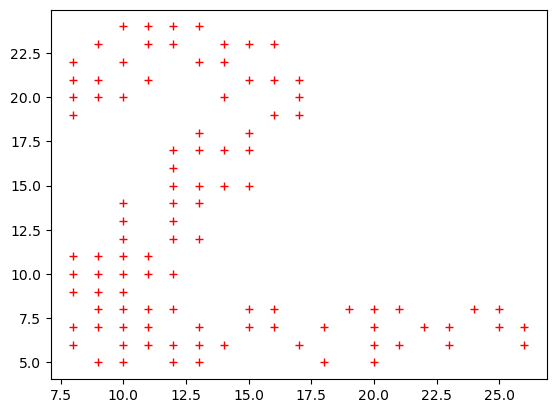

In [5]:
mapping = np.arange(3*size).reshape(-1, 3)
inds = mapping[:, :2]
val_ind = mapping[:, 2]
img = np.zeros((28, 28))
fisrt_img = mnist.to_numpy()[1]
coordinates = fisrt_img[inds]
img[coordinates[:,0], coordinates[:, 1]] = 1
plt.plot(coordinates[:,0], coordinates[:, 1], '+',color='red',)


In [6]:
mu, sigma = 0, 0.5 # mean and standard deviation
s1 = np.random.normal(mu, sigma, size)
s2 = np.random.normal(mu, sigma, size)

In [7]:
sqrt2d2 = np.sqrt(2)/2
R = np.array([[sqrt2d2, sqrt2d2], [-sqrt2d2, sqrt2d2]])
t = np.array([0.5, 0.5])
noise = np.hstack((s1.reshape(-1, 1), s2.reshape(-1, 1)))

In [8]:
from problem_instance.twoD_point_cloud_registeration import model, pairwise_compatibility_value, definite_graph, area_invariant_compatibility_test

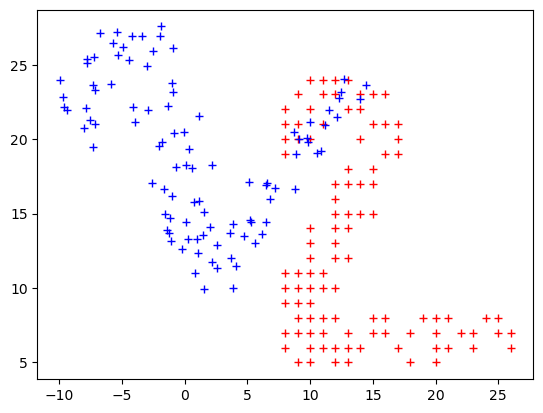

In [9]:
new_coord = model(R, t, coordinates, noise)
plt.plot(coordinates[:,0], coordinates[:, 1], '+', color='red')
plt.plot(new_coord[:,0], new_coord[:, 1], '+', color='blue',)

In [10]:
outliers = 28 * np.random.rand(20, 2) # 20 outliers points in 2D
outliers_cord_t = model(R, t, outliers, np.zeros((20, 2)))

In [11]:
new_coord_with_outliers = np.vstack((new_coord[:-20], outliers_cord_t))
inlier_mask = np.zeros(size, dtype=bool)
inlier_mask[:-20] = True

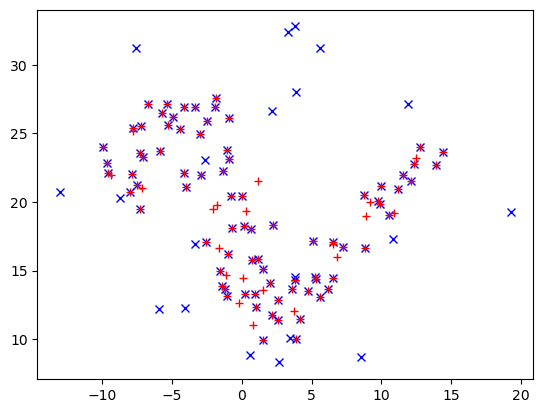

In [12]:
plt.plot(new_coord_with_outliers[:,0], new_coord_with_outliers[:, 1], 'x', color='blue')
plt.plot(new_coord[:,0], new_coord[:, 1], '+', color='red')

In [13]:
perm = np.random.permutation(size)
new_coord_with_outliers = new_coord_with_outliers[perm]
coordinates = coordinates[perm]
inlier_perm_mask = inlier_mask[perm]

In [14]:
weigthed_G = pairwise_compatibility_value(coordinates, new_coord_with_outliers)
G = definite_graph(weigthed_G, 3.91)

In [15]:
from QUBO_formulation.limited_vertex import split
sslg, _ = split(G, 95, 10, "dwave_annealing")

In [16]:
sslg = list(sslg)

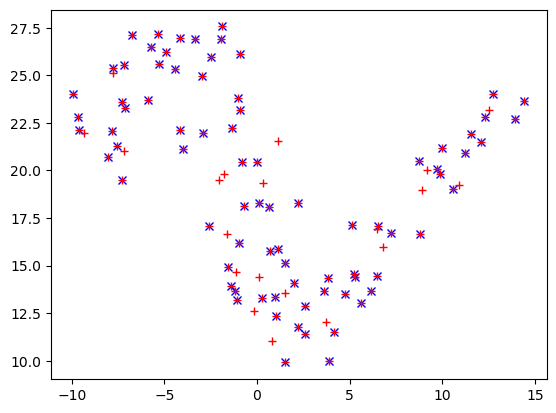

In [17]:
plt.plot(new_coord_with_outliers[sslg, 0], new_coord_with_outliers[sslg, 1], 'x', color='blue')
plt.plot(new_coord[:,0], new_coord[:, 1], '+', color='red')

In [19]:
sol = np.zeros(size, dtype=bool)
sol[sslg] = True

In [20]:
evaluate(size, inlier_perm_mask, sol)

Overall Accuracy:  1.0
Inlier Preserved Rate:  1.0
Outlier Rejected Rate:  1.0
